# TikTok Project

## 1 - Understanding the Data & EDA

In [52]:
%pip install seaborn

# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
data = pd.read_csv('tiktok_dataset.csv')

**Inspect the data**

In [3]:
# First 10 rows of the dataframe
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [5]:
# Summary info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.5+ MB


In [6]:
# Summary statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**Question 1:** The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.

**Question 2:** The dataframe contains five float64s, three int64s, and four objects. There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.

**Question 3:** Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.ues.

**Investigate the variables**

From the project proposal, we know that the ultimate objective is to use machine learning to classify videos as either claims or opinions. 

A good first step towards understanding the data might therefore be examining the claim_status variable. Begin by determining how many videos there are for each different claim status.

In [7]:
# What are the different values for claim status and how many of each are in the data?

data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

The counts of each claim status are quite balanced.

Let's examine the engagement trends associated with each different claim status.

In [8]:
# What is the average view count of videos with "claim" status?

claims = data[data['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [9]:
# What is the average view count of videos with "opinion" status?

opinions = data[data['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

Now, let's examine trends associated with the ban status of the author.

In [10]:
# Get counts for each group combination of claim status and author ban status

data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:

* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

Finally, while you can use this data to draw conclusions about banned/active authors, you cannot draw conclusions about banned videos. There's no way of determining whether a particular video _caused_ the ban, and banned authors could have posted videos that complied with the terms of service.


Continue investigating engagement levels, now focusing on `author_ban_status`._status.

In [11]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [12]:
# What's the median video share count of each author ban status?

data.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


In [13]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

A few observations stand out:
* Banned authors and those under review get far more views, likes, and shares than active authors.
* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

In [14]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

In [15]:
data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, *when a video does get viewed*, its engagement rate is less related to author ban status and more related to its claim status.

Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

* Of the 19,382 samples in this dataset, just under 50% are claims&mdash;9,608 of them.  
* Engagement level is strongly correlated with claim status. This should be a focus of further inquiry.
* Videos with banned authors have significantly higher engagement than videos with active authors. Videos with authors under review fall between these two categories in terms of engagement levels.

## Visualization

**video_duration_sec**

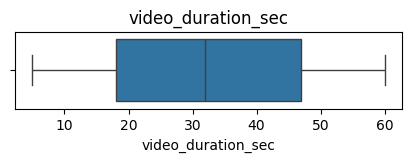

In [16]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec']);

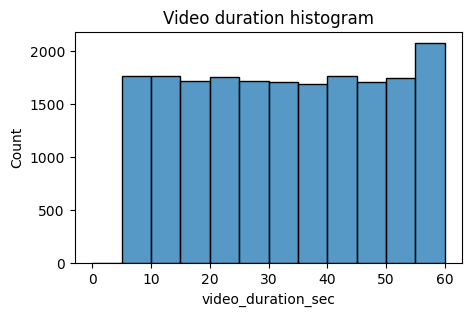

In [17]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

**video_view_count**

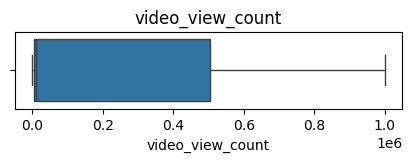

In [18]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5, 1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count']);

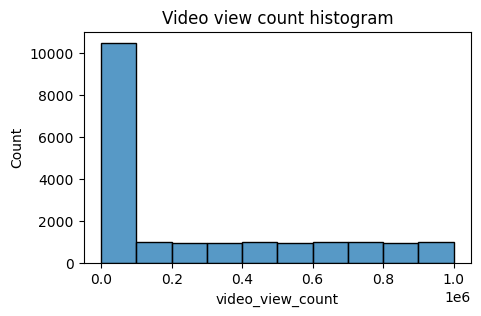

In [19]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram');

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

**video_like_count**

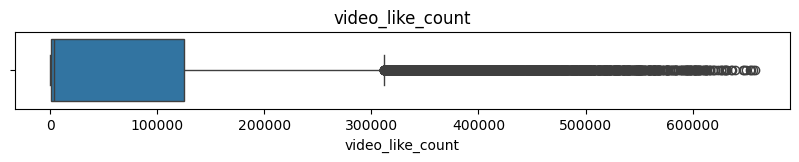

In [20]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count']);

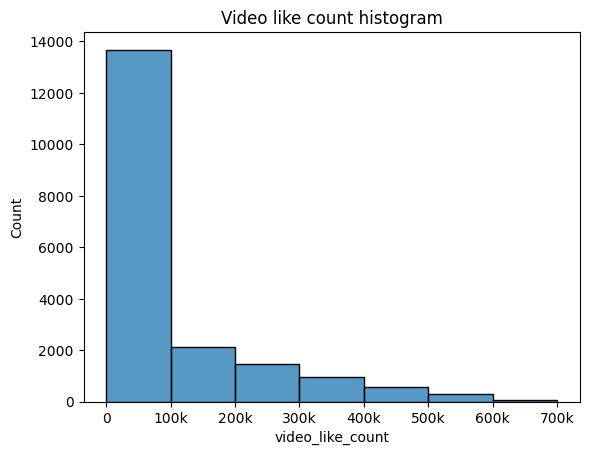

In [21]:
# plt.figure(figsize=(5,3))
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

**video_comment_count**

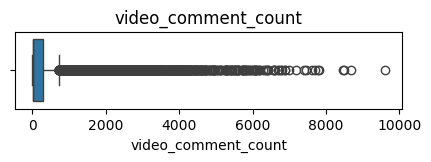

In [22]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count']);

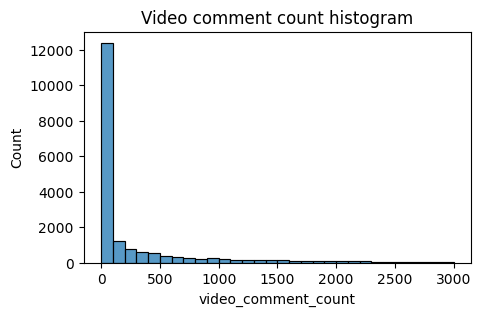

In [23]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

**video_share_count**

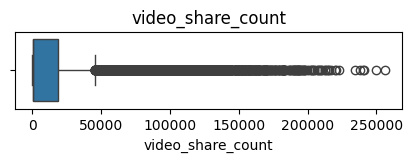

In [24]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count']);

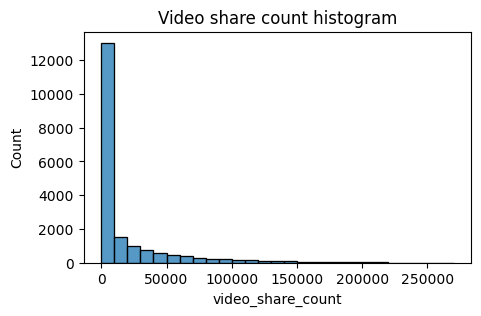

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

**Claim status by verification status**

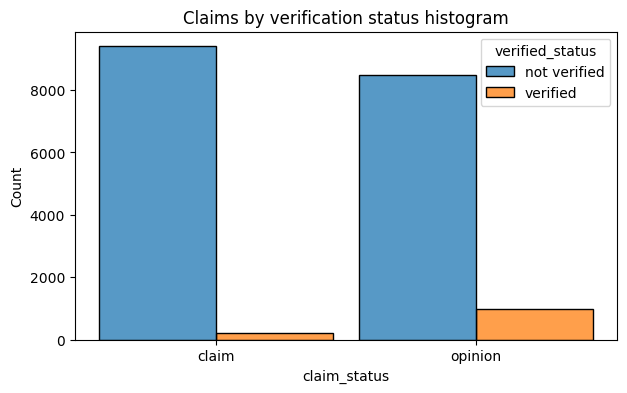

In [26]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

**Claim status by author ban status**

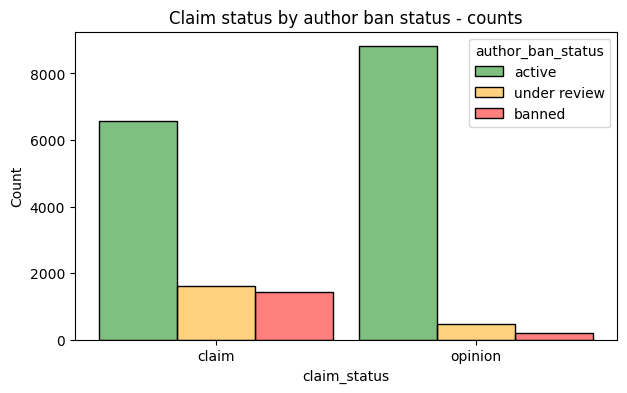

In [27]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

**Median view counts by ban status**

<ipython-input-28-edd7528d44bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ban_status_counts,


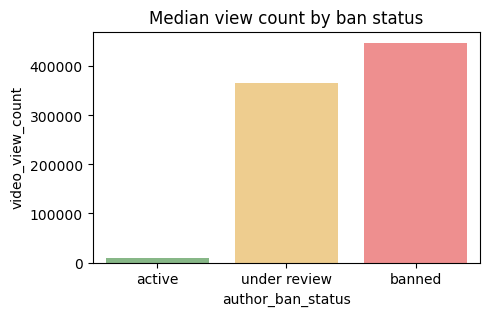

In [28]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of claim status.

Indeed, a quick check of the median view count by claim status bears out this assessment:

In [29]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

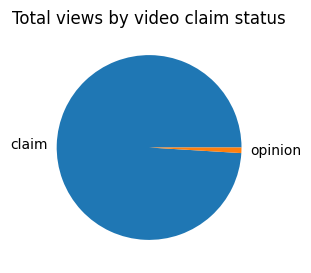

In [30]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

# Hyphotesis Testing

In [ ]:
# Check for missing values
data.isna().sum()

In [38]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [39]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


We are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean values of `video_view_count` for each group of `verified_status` in the sample data.

In [40]:
# Let's compute the mean `video_view_count` for each group in `verified_status`
data.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis


*   **Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
*    **Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

5% as the significance level and proceed with a two-sample t-test.

In [41]:
# Conduct a two-sample t-test to compare means
# Save each sample in a variable
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is extremely small (much smaller than the significance level of 5%), you reject the null hypothesis. You conclude that there is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

# Feature Engineering

In [45]:
# Create `text_length` column
data['text_length'] = data['video_transcription_text'].str.len()
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


In [46]:
data[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


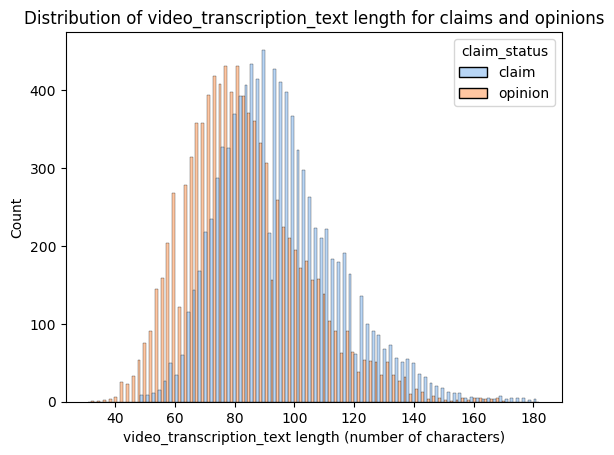

In [47]:
# Visualize the distribution of `text_length` for claims and opinions

sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters—about 13 more on average, as indicated in a previous cell.lt.show()

**Feature selection and transformation**

In [48]:
X = data.copy()
# Drop unnecessary columns
X = X.drop(['#', 'video_id'], axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
# Dummy encode remaining categorical values
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97,0,0,1
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107,0,0,0
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137,0,0,0
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131,0,0,0
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128,0,0,0


**Split the Data**

In [49]:
# Isolate target variable
y = X['claim_status']

In [66]:
# Isolate features
X = X.drop(['video_transcription_text'], axis=1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97,0,0,1
1,32,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128,0,0,0


Split data into training and testing sets, 80/20.

In [67]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [68]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [69]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 13), (3817, 13), (3817, 13), (11450,), (3817,), (3817,))

# Build a Random Forest Model

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [70]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring= scoring , cv=5, refit='recall')

In [71]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [72]:
# Examine best recall score
rf_cv.best_score_

0.9924066515562668

In [73]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 0.3,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

This model performs exceptionally well, with an average recall score of 0.992 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

# Build an XGBoost Model

In [74]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [75]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [76]:
xgb_cv.best_score_

0.9925792141101926

In [77]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

This model also performs exceptionally well.

# Evaluate Models

In [78]:
# Use the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val)

In [79]:
# Display the predictions on the validation set
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
# Display the true labels of the validation set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

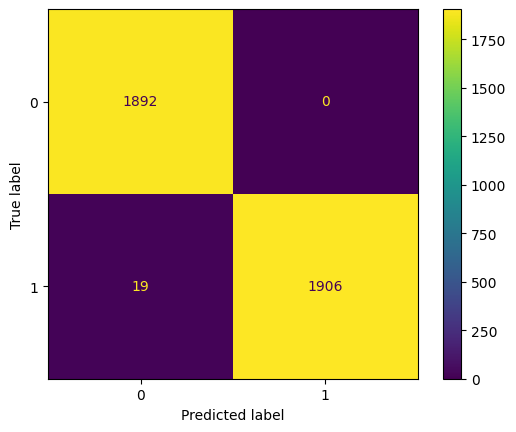

In [81]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives: the number of opinions that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of opinions that the model misclassified as claims.

The lower-left quadrant displays the number of false negatives: the number of claims that the model misclassified as opinions.

The lower-right quadrant displays the number of true positives: the number of claims that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false posinegatives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [82]:
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



The classification report above shows that the random forest model scores were nearly perfect.

**XGBoost**

In [83]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val)

In [84]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

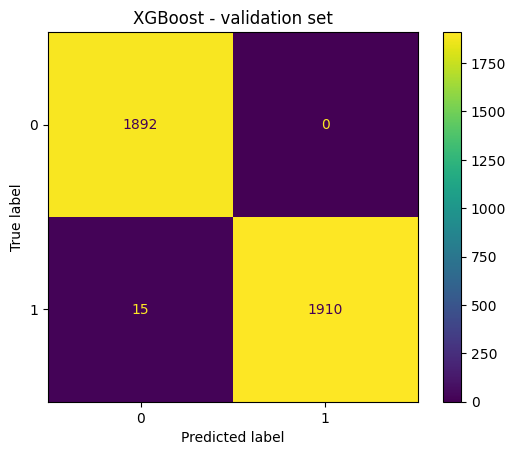

In [85]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()

In [86]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



The results of the XGBoost model were also nearly perfect. Resulting in a lower value of false negatives.

**Use champion model to predict on test data**

Both random forest and XGBoost model architectures resulted in nearly perfect models. Nonetheless, in this case XGBoost performed a little bit better, so it is the champion model.

Now, use the champion model to predict on the test data.

In [88]:
# Use champion model to predict on test data
y_pred = xgb_cv.best_estimator_.predict(X_test)

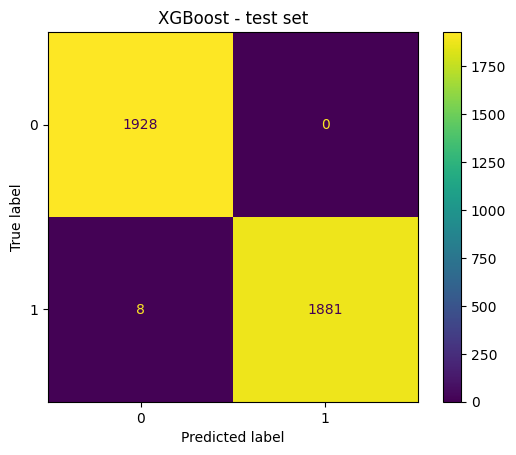

In [89]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - test set');
plt.show()

**Feature importances**

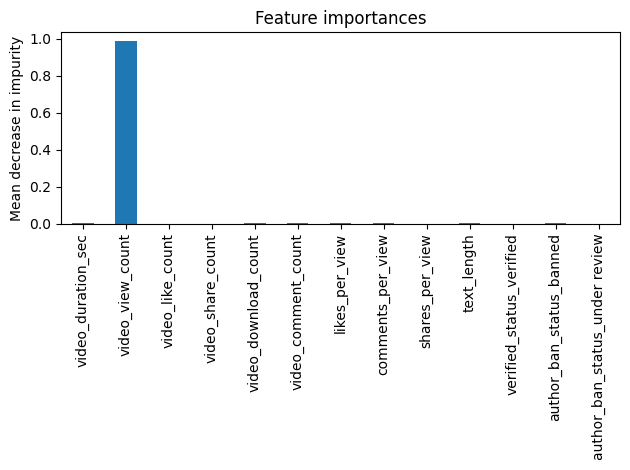

In [90]:
#XGBoost
importances = xgb_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

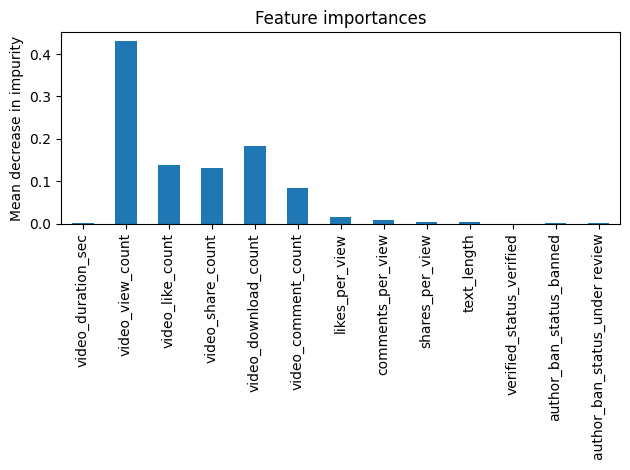

In [92]:
#Random Forest
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.

# Conclusion

The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received. I recommend these models because they performed well on both the validation and test holdout data. Furthermore, both precision and F1 scores were consistently high. The models very successfully classified claims and opinions.

We could improve the model by working on the `video_transcription_text` column, taking into account the words that are most recurring.